In [1]:
from pycolator import *
x = np.linspace(-4,4,100).tolist()
plt.subplot(2,2,1)
plt.plot(x, [i**2 for i in x])
plt.subplot(2,2,2)
plt.plot(x, [i**6 for i in x])
plt.subplot(2,1,2)
plt.plot(x, [i**4 for i in x])
plt.savefig('Test.png')
plt.savefig('Test2.png', dpi = 300)

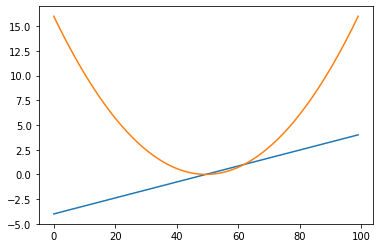

In [2]:
ls = [x, [i**2 for i in x]]
test = [[a,b] for a,b in zip(ls[0],ls[1])]
plt.plot(test)

In [3]:
test = []
test.append([1,2,3])
test.append([3,4,5])
test

[[1, 2, 3], [3, 4, 5]]

In [4]:
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'class-specific_q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol, excludedCols = excluded)

file read
strings converted to numbers
q-values estimated
ranks computed
features normed
file ready


In [48]:
badSpecs = dSlow[(dSlow['Rank'] == 1) & (dSlow['Label'] == 0)]['SpecId'].tolist()
goodSpecs = list(set(dSlow['SpecId']) - set(badSpecs))
print(len(badSpecs))
print(len(goodSpecs))
print(len(set(dSlow['SpecId'])))
print(len(dSlow))

12103
19137
31240
93219


In [50]:
trueTrain1 = dSlow.loc[list(dSlow[(dSlow['q-val'] <= 0.05) & (dSlow.Label == 1) & (dSlow['SpecId'].isin(goodSpecs))].index),:]
trueTrain2 = dSlow.loc[list(dSlow[(dSlow['q-val'] <= 0.05) & (dSlow.Label == 1)].index),:]
print(len(trueTrain1))
print(len(trueTrain2))

5480
5498


In [51]:
res = dSlow[(dSlow['Label'] == 0) | (dSlow['SpecId'].isin(badSpecs))]
print(len(res[res.Label == 1]))
print(len(res))
print(len(dSlow[(dSlow['Label'] == 0)]))
#11200
#53792

11200
53792
42592


In [37]:
ls = []
for i in res[res.Label == 1]['SpecId'].tolist():
    ls.append(i in badSpecs)
all(ls)

True

Training in iteration 1 with split 1/3 starts!
Training in iteration 1 with split 2/3 starts!
Training in iteration 1 with split 3/3 starts!
Iteration 1/2 done!
Training in iteration 2 with split 1/3 starts!
Training in iteration 2 with split 2/3 starts!
Training in iteration 2 with split 3/3 starts!
Iteration 2/2 done!


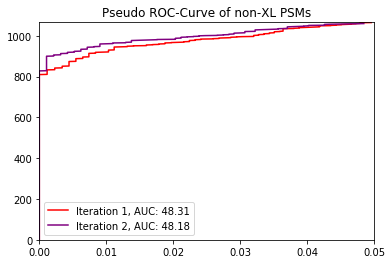

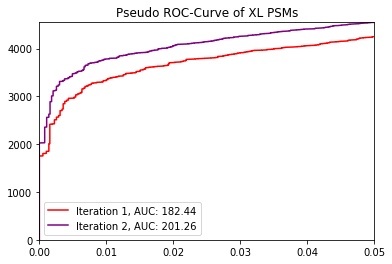

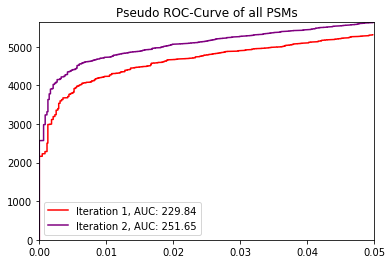

In [2]:
p = percolator(dSlow, idCol, excluded, I = 2, plotEveryIter = True, plotSaveName = 'Test.png')

In [7]:
features = [x for x in list(dSlow.columns) if (x not in excluded)]

In [8]:
dSlow.sort_values('SpecId',inplace = True, kind = 'mergesort')
dSlow[['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'Rank']]

,SpecId,Label,ScanNr,Peptide,Proteins,Rank
18317,controllerType=0controllerNumber=1scan=10001,0,10001,K.n[+43.005814000000001]YPFYSGPESCCYK[+43.0058...,DECOY_sp|A6NKW6|SHL2B_HUMAN,1
18318,controllerType=0controllerNumber=1scan=10004,1,10004,R.VVSAPVGKETPSKR.M,sp|Q13416|ORC2_HUMAN,1
18319,controllerType=0controllerNumber=1scan=10004,0,10004,R.LM[+15.994915000000001]GAPSMLARLSFDGR.Q,DECOY_sp|O75144|ICOSL_HUMAN,2
18320,controllerType=0controllerNumber=1scan=10004,0,10004,R.GPSLPSCTTPSCGGM[+15.994915000000001]NM[+15.9...,DECOY_sp|Q17RG1|KCD19_HUMAN,3
18321,controllerType=0controllerNumber=1scan=10004,1,10004,R.WEATPWTACSSSCGGGIQSR.A,sp|Q8N6G6|ATL1_HUMAN,4
18322,controllerType=0controllerNumber=1scan=10005,1,10005,R.LAYIAHPK.L,sp|P47914|RL29_HUMAN,1
18323,controllerType=0controllerNumber=1scan=10005,0,10005,K.NPVCPTHPK.R,DECOY_sp|O76039|CDKL5_HUMAN,2
18324,controllerType=0controllerNumber=1scan=10005,0,10005,K.CFGCQKNGHPK.R,DECOY_sp|Q92576|PHF3_HUMAN,3
18325,controllerType=0controllerNumber=1scan=10006,1,10006,K.EVEKLQEKR.E,sp|O00139|KIF2A_HUMAN,1
18326,controllerType=0controllerNumber=1scan=10006,0,10006,R.VEEIKCICFRK.C,DECOY_sp|P29375|KDM5A_HUMAN,2


In [16]:
idParts = np.array_split(dSlow['SpecId'].sample(frac = 1, replace = False), 3)

Wall time: 32 ms


In [14]:
threeParts = [dSlow[dSlow['SpecId'].isin(idParts[0])],dSlow[dSlow['SpecId'].isin(idParts[1])],dSlow[dSlow['SpecId'].isin(idParts[2])]]

Wall time: 180 ms
